In [ ]:
import pandas as pd
df = pd.read_csv("dump.csv")
df.head()

In [ ]:
import pandas as pd

arr = []
arr.append(pd.read_csv('../data files/results/CubeSort.csv'))
arr.append(pd.read_csv('../data files/results/QuickSort.csv'))
arr.append(pd.read_csv('../data files/results/MergeSort.csv'))
arr.append(pd.read_csv('../data files/results/HeapSort.csv'))

df = pd.concat(arr,ignore_index=True)

df.head()

,Algorithm,Runtime
0,CubeSort,3.989099
1,CubeSort,5.498144
2,CubeSort,5.464906
3,CubeSort,5.503226
4,CubeSort,5.529292


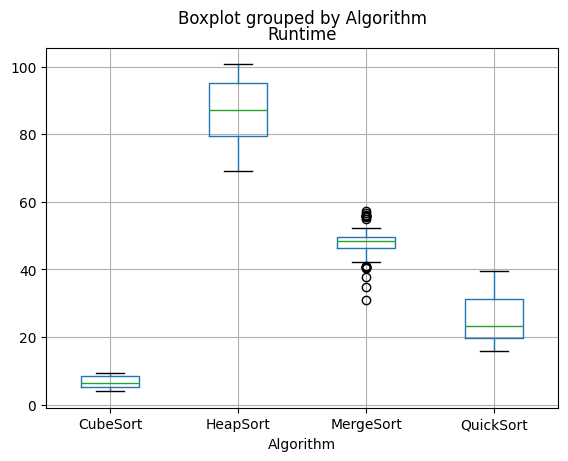

In [23]:
import matplotlib.pyplot as plt
df.boxplot(column="Runtime", by="Algorithm")
plt.show()

Hipótesis H_0: El promedio del tiempo de ejecución para los 4 algoritmos es el mismo

In [24]:
# Verificación de supuestos de distribución normal y homogeneidad de varianzas
import scipy.stats
SIGNIFICANCE = 0.05
normal_distributions = True
homogeneous_variances = True

ss = []
for algo in ["CubeSort","QuickSort","MergeSort","HeapSort"]:
  subset = df.loc[df['Algorithm'] == algo, 'Runtime']
  ss.append(subset)
  stat, p_value = scipy.stats.shapiro(subset)
  print(f"Shapiro-Wilk for {algo} group: stat={stat}, p-value={p_value}")
  if p_value < SIGNIFICANCE:
    normal_distributions = False

stat, p_value = scipy.stats.levene(ss[0],ss[1],ss[2],ss[3])
print(f"Levene test for all four groups: stat={stat}, p-value={p_value}")
if p_value < SIGNIFICANCE:
  homogeneous_variances = False

Shapiro-Wilk for CubeSort group: stat=0.8893746141483039, p-value=4.6246978348670115e-07
Shapiro-Wilk for QuickSort group: stat=0.9113387676892822, p-value=5.027551864548044e-06
Shapiro-Wilk for MergeSort group: stat=0.9413583762288623, p-value=0.00023353945073353356
Shapiro-Wilk for HeapSort group: stat=0.9517306899141734, p-value=0.0010805331247415726
Levene test for all four groups: stat=49.67960933102417, p-value=2.843996146959575e-27


In [25]:
# Anova o alternativas
null_hypothesis = True
if normal_distributions and homogeneous_variances:
  f_stat, p_value = scipy.stats.f_oneway(ss[0],ss[1],ss[2],ss[3])
  print(f"ANOVA for algorithm runtimes: f-stat={f_stat}, p-value={p_value}")
else: # todo: Implement Welch's ANOVA
  h_stat, p_value = scipy.stats.kruskal(ss[0],ss[1],ss[2],ss[3])
  print(f"Kruskal-Wallis test for algorithm runtimes: H-stat={h_stat}, p-value={p_value}")

  
if p_value < SIGNIFICANCE:
  null_hypothesis = False

Kruskal-Wallis test for algorithm runtimes: H-stat=373.43904837905234, p-value=1.2529946888037392e-80


In [26]:
# Post hoc tests
if not null_hypothesis:
  if normal_distributions:
    scipy.stats.tukey_hsd(ss[0],ss[1],ss[2],ss[3])
  else:
    import scikit_posthocs
    p_values = scikit_posthocs.posthoc_dunn(df, val_col="Runtime", group_col="Algorithm", p_adjust="bonferroni")
    print(p_values)

               CubeSort      HeapSort     MergeSort     QuickSort
CubeSort   1.000000e+00  2.045424e-74  1.722236e-33  4.896369e-09
HeapSort   2.045424e-74  1.000000e+00  4.896369e-09  1.722236e-33
MergeSort  1.722236e-33  4.896369e-09  1.000000e+00  7.931571e-09
QuickSort  4.896369e-09  1.722236e-33  7.931571e-09  1.000000e+00


Para cada par que tenga un valor p menor que el nivel de significancia trabajado de 5%, se rechaza la hipótesis nula de la prueba de Dunn que señala que el tiempo de ejecución medio entre ambos algoritmos es igual.

A partir de la prueba de Dunn como prueba post hoc a Kruskal-Walliz con corrección de Bonferroni para controlar los falsos positivos, todos los algoritmos tienen medias diferentes por factores no atribuibles al azar.

In [ ]:
# df.to_csv("dump.csv",index=False)